<a href="https://colab.research.google.com/github/Vivekchavda1374/ML/blob/main/Project_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


SVM Model Accuracy:  0.7583060898654299
              precision    recall  f1-score   support

           0       0.78      0.73      0.75      6638
           1       0.74      0.79      0.76      6515

    accuracy                           0.76     13153
   macro avg       0.76      0.76      0.76     13153
weighted avg       0.76      0.76      0.76     13153

Naïve Bayes Model Accuracy:  0.743632631338858
              precision    recall  f1-score   support

           0       0.75      0.74      0.74      6638
           1       0.74      0.75      0.74      6515

    accuracy                           0.74     13153
   macro avg       0.74      0.74      0.74     13153
weighted avg       0.74      0.74      0.74     13153

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for Naïve Bayes: {'multinomialnb__alpha': 2}


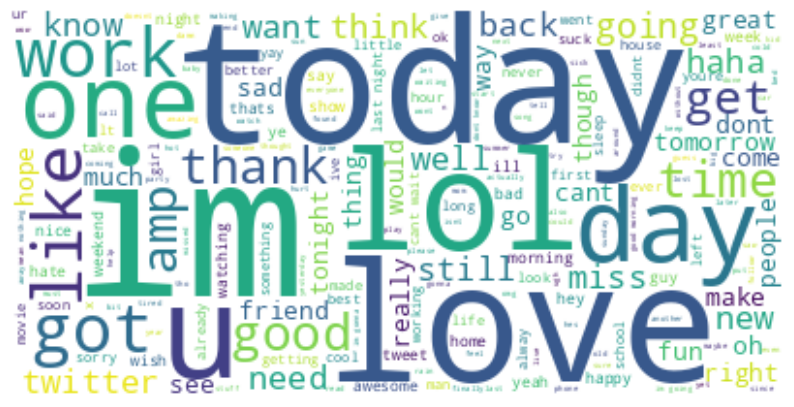

In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import GridSearchCV

# Load dataset
data = pd.read_csv('/content/Sentiment.csv')

# Text cleaning function
def clean_text(text):
    # Remove special characters, numbers, and extra spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower().strip()
    return text

# Apply text cleaning
data['Cleaned_Text'] = data['Text'].apply(clean_text)

# Tokenization & Removing stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Define function to remove stopwords
def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Apply stopwords removal
data['Cleaned_Text'] = data['Cleaned_Text'].apply(remove_stopwords)

# Splitting dataset into training and test sets
X = data['Cleaned_Text']
y = data['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)

# Create SVM Model pipeline
svm_model = make_pipeline(vectorizer, SVC(kernel='linear'))

# Train the SVM classifier
svm_model.fit(X_train, y_train)

# Predict using SVM
y_pred_svm = svm_model.predict(X_test)

# Model Evaluation for SVM
print("SVM Model Accuracy: ", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# Create Naïve Bayes Model pipeline
nb_model = make_pipeline(vectorizer, MultinomialNB())

# Train the Naïve Bayes classifier
nb_model.fit(X_train, y_train)

# Predict using Naïve Bayes
y_pred_nb = nb_model.predict(X_test)

# Model Evaluation for Naïve Bayes
print("Naïve Bayes Model Accuracy: ", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

# GridSearchCV for Naïve Bayes to tune hyperparameters
param_grid = {'multinomialnb__alpha': [0.5, 1, 1.5, 2]}
grid_search = GridSearchCV(nb_model, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters for Naïve Bayes
print("Best parameters for Naïve Bayes:", grid_search.best_params_)

# Visualization of most frequent words using WordCloud
wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(' '.join(data['Cleaned_Text']))
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

